<a href="https://colab.research.google.com/github/109368018yumin/109368018yumin/blob/main/Remove_RF_LR_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Remove Outliers**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

drive.mount('/content/drive')
%cd /content/drive/MyDrive/dissertation/UIC_data/output/
df_all = pd.read_csv("NORMAL_BLOOD_PRESSURE2.csv") 

num_features = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
#num_features = ['PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dissertation/UIC_data/output


,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [2]:
df.describe()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000,54819.000000
mean,0.273917,0.196879,0.640121,0.441881,0.470796,0.169325,0.599063,114.441936,66.816257
std,0.042488,0.094932,0.127592,0.098849,0.089428,0.067952,0.130493,9.595277,5.005797
min,0.008000,0.008000,0.224000,0.033333,0.128000,-0.264000,0.052632,80.065000,60.020000
25%,0.248000,0.128000,0.544000,0.365079,0.400000,0.128000,0.506849,107.990000,62.716000
50%,0.272000,0.176000,0.608000,0.450704,0.456000,0.152000,0.609375,114.780000,65.842000
75%,0.296000,0.248000,0.720000,0.515625,0.528000,0.176000,0.683333,122.110000,69.798000
max,0.640000,0.936000,2.136000,0.750000,1.144000,1.624000,0.977273,129.970000,79.997000


In [3]:
ft = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']

#ft = ['PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
remove = set()
indices = set()
for x in ft:
  q25, q75 = np.percentile(df.loc[:,x], [25, 75])
  n=1.5  #1.5倍四分位距
  #IQR=Q3-Q1
  intra = q75 - q25
  # outlier = Q3 + n*IQR 
  max = q75 + intra *n
  # outlier = Q1 - n*IQR 
  min = q25 - intra *n
  
  transform_data1 = df.loc[df[x] < min, x].index
  transform_data2 = df.loc[df[x] > max, x].index
  remove = remove.union(transform_data1).union(transform_data2)

In [4]:
df.drop(remove, inplace=True)
df.to_csv('remove0309_2.csv')
#########remove outliers###########

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=9cff676b016b5de885ee2696235937729de02f8f366529916be454b7be0aa0be
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_all = pd.read_csv("remove0309_2.csv") 

num_features = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
#num_features = ['PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [7]:
df.describe()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000,47947.000000
mean,0.273021,0.186819,0.614318,0.455204,0.459840,0.154478,0.608479,113.805195,66.989564
std,0.035669,0.082116,0.093731,0.091035,0.073621,0.032073,0.121172,9.503319,5.007147
min,0.184000,0.016000,0.360000,0.216981,0.224000,0.080000,0.302632,80.065000,60.020000
25%,0.248000,0.128000,0.544000,0.400000,0.400000,0.128000,0.533333,107.550000,62.892000
50%,0.272000,0.160000,0.592000,0.462366,0.448000,0.152000,0.625000,114.050000,66.135000
75%,0.296000,0.232000,0.680000,0.522388,0.512000,0.168000,0.684211,121.160000,69.994000
max,0.368000,0.424000,0.944000,0.718750,0.720000,0.240000,0.945946,129.970000,79.997000


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


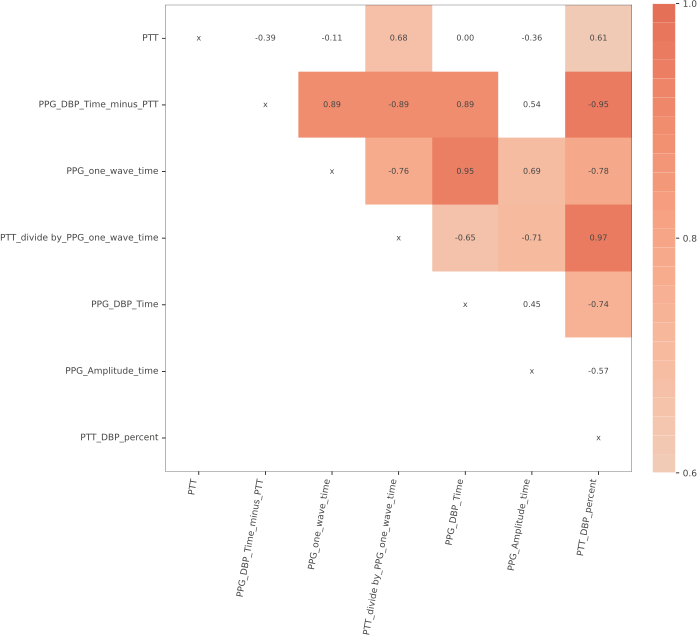

In [8]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
df_target.head()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
folds = KFold(n_splits=10, shuffle=True)

# resplit the data after processing
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3)

from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(x_train,figsize=(10,10))
viz


**RandomForest Regressor**

MAE SBP: 5.707204540589253 SD:7.970266692185316 MAE DBP: 2.9340027032143388 SD:4.0745404833813


<Figure size 432x288 with 0 Axes>

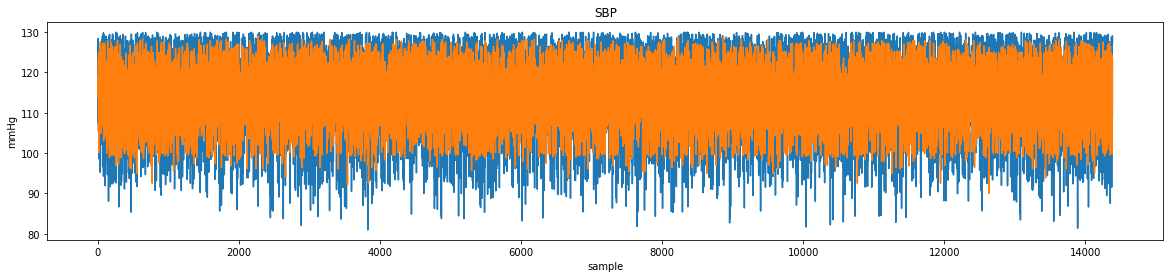

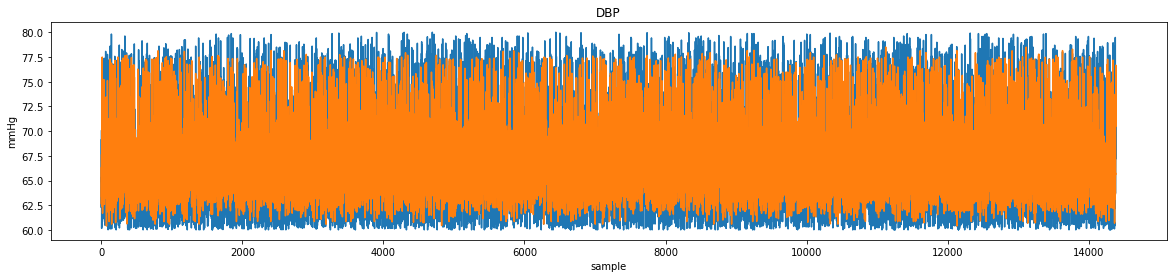

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.figure(figsize=(20,4))
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.figure(figsize=(20,4))
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**Linear Regression**

MAE SBP: 7.440886931853815 SD:9.219719830323633 MAE DBP: 4.028674573794801 SD:4.92993064151522


<Figure size 432x288 with 0 Axes>

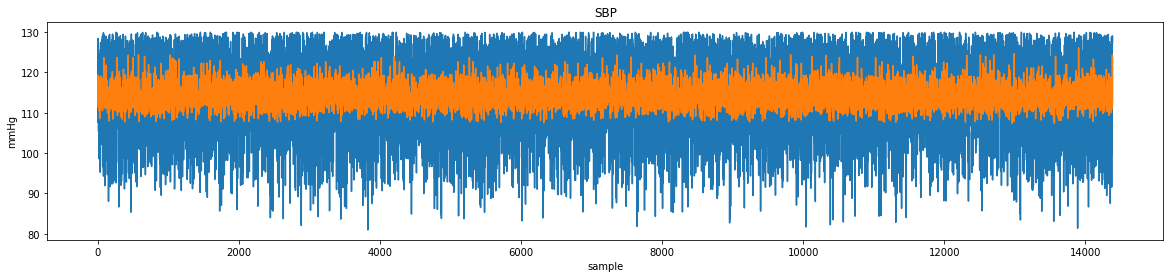

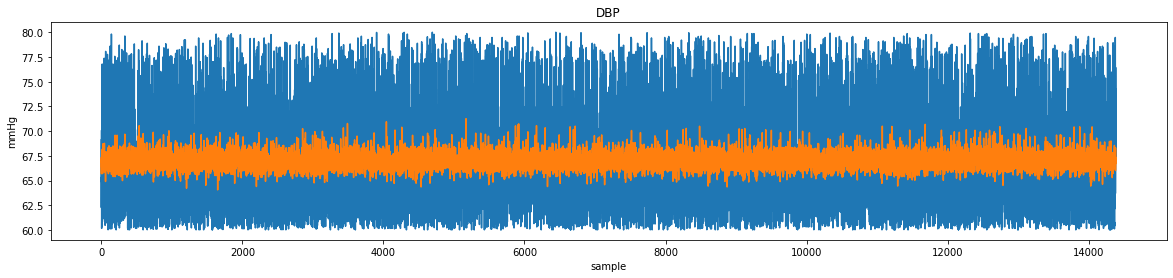

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(x_train, y_train)
prediction = linear.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.figure(figsize=(20,4))
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.figure(figsize=(20,4))
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**K_Fold**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
forest = RandomForestRegressor(n_estimators=100)
errors_sbp = []
errors_dbp = []

errors_sbp_std = []
errors_dbp_std = []

for i, (train_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    train_data, train_target = x_train.iloc[train_idx], y_train.iloc[train_idx]
    val_data, val_target = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    forest.fit(train_data, train_target) 
    predictions = forest.predict(val_data)

    error_sbp = mean_absolute_error(predictions[:,0], val_target["SBP"].values)
    error_dbp = mean_absolute_error(predictions[:,1], val_target["DBP"].values)

    error_sbp_std = np.std(predictions[:,0] - val_target["SBP"].values)
    error_dbp_std = np.std(predictions[:,1] - val_target["DBP"].values)

    print(f"Train fold {i} MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

    errors_sbp.append(error_sbp)
    errors_dbp.append(error_dbp)
    errors_sbp_std.append(error_sbp_std)
    errors_dbp_std.append(error_dbp_std)
    
print(f"Average MAE SBP: {np.mean(errors_sbp)} SD:{np.mean(errors_sbp_std)} MAE DBP: {np.mean(errors_dbp)} SD:{np.mean(errors_dbp_std)}")

Train fold 0 MAE SBP: 5.925764661349428 SD:8.235449507651532 MAE DBP: 2.9952061170009725 SD:4.151455974689157
Train fold 1 MAE SBP: 5.565362111029205 SD:7.92402734208497 MAE DBP: 2.8698253847288293 SD:3.9957829295504483
Train fold 2 MAE SBP: 5.602066285792734 SD:7.93356088863933 MAE DBP: 2.9530205011580835 SD:4.132015490899471
Train fold 3 MAE SBP: 5.668281162721831 SD:7.944596239027092 MAE DBP: 2.8780959410888305 SD:4.040060505733763
Train fold 4 MAE SBP: 5.836195051539625 SD:8.15261550229157 MAE DBP: 2.900185973483429 SD:3.9780178878646995
Train fold 5 MAE SBP: 5.6486129293019784 SD:7.946951998291609 MAE DBP: 2.855102874783373 SD:3.9951548942571544
Train fold 6 MAE SBP: 5.669384156543368 SD:7.928267186008965 MAE DBP: 2.9467454956610615 SD:4.121811631282131
Train fold 7 MAE SBP: 5.616870877591263 SD:7.832766177539819 MAE DBP: 2.9780044887119996 SD:4.096431627447206
Train fold 8 MAE SBP: 5.774796027526132 SD:8.028007983632651 MAE DBP: 2.914077067374128 SD:4.059390820017017
Train fold 9

**Feature Importances**

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error ,r2_score

# print('The mean absolute error is' , mean_absolute_error(predictions,y_test ))
# print('The mean squared error is' , mean_squared_error(predictions,y_test ))
# print('The R squared error is' , r2_score(predictions,y_test))

import pandas as pd
feature_imp = pd.Series(forest.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

#PPG_Amplitude_time                      波谷到波峰
#PPG_DBP_Time                            波峰到波谷
#PTT_DBP_percent                         NR-PTT  PTT在舒張期間所經過的時間比例
#PTT                                     波峰到重搏波
#PPG_DBP_Time_divide_PTT                 重搏波到波谷
#PPG_one_wave_time                       波峰到波峰
#PTT_divide by_PPG_one_wave_time         ptt/one wave time

PPG_Amplitude_time                 0.228761
PPG_one_wave_time                  0.189695
PTT_divide by_PPG_one_wave_time    0.180831
PPG_DBP_Time                       0.147099
PTT_DBP_percent                    0.111071
PPG_DBP_Time_minus_PTT             0.080292
PTT                                0.062252
dtype: float64

ANN

In [13]:
import pandas as pd
#from google.colab import drive 
import numpy as np 

#drive.mount('/content/gdrive')
#%cd /content/gdrive/MyDrive/Colab Notebooks/
#df_all = pd.read_csv("org_train_normal_new.csv") 
#num_features = ['cardiac_period', 'SUT', 'DT', 'DW_10', 'DW_25', 'DW_33', 'DW_50', 'DW_66','DW_75', 'SW_10 + DW_10', 'SW_10/DW_10', 'SW_25 + DW_25', 'SW_25/DW_25', 'SW_33 + DW_33', 'SW_33/DW_33','SW_50 + DW_50', 'SW_50 / DW_50', 'SW_66 + DW_66', 'SW_66 / DW_66','SW_75 + DW_75', 'SW_75 / DW_75','area','area_s','area_d']

#正常特徵
num_features = ['PTT', 'PPG_DBP_Time_minus_PTT','PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
#num_features = ['PPG_one_wave_time','PTT_divide by_PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
#高血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SW_50 + DW_50','DW_33','SW_33/DW_33','SW_10/DW_10']

#低血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SUT','area','SW_10/DW_10','SW_25/DW_25']

#混和特徵
#num_features = ['cardiac_period','SUT', 'DT','DW_50','SW_75 / DW_75','area_d','DW_75', 'SW_10/DW_10']

target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.451613,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.475410,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.483871,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.475410,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.466667,0.352,0.128,0.636364,121.62,67.063


In [14]:
#df.describe()

In [15]:
def normalize(df):
    norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return norm

In [34]:
df = normalize(df)
df

,PTT,PPG_DBP_Time_minus_PTT,PPG_one_wave_time,PTT_divide by_PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent
0,0.217391,0.313725,0.232877,0.467609,0.290323,0.30,0.475761
1,0.260870,0.294118,0.219178,0.515035,0.290323,0.25,0.509554
2,0.304348,0.274510,0.232877,0.531898,0.290323,0.30,0.543346
3,0.260870,0.274510,0.219178,0.515035,0.274194,0.30,0.531331
4,0.217391,0.274510,0.205479,0.497611,0.258065,0.30,0.518770
...,...,...,...,...,...,...,...
47942,0.652174,0.509804,0.561644,0.448173,0.612903,0.50,0.424561
47943,0.608696,0.549020,0.575342,0.415144,0.629032,0.50,0.388002
47944,0.608696,0.529412,0.561644,0.424999,0.612903,0.50,0.401008
47945,0.652174,0.509804,0.547945,0.458533,0.612903,0.45,0.424561


In [17]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
# df_target.head()

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=3)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(X_train)
x_test=sc_X.transform(X_test)

In [20]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=5)

In [21]:
print(len(x_train))
print(len(x_test))
print(len(x_val))

33562
7193
7192


In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(33562, 7)
(33562, 2)
(7192, 7)
(7192, 2)
(7193, 7)
(7193, 2)


In [23]:
# from keras import optimizers,Sequential
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU
# from keras.layers.normalization import BatchNormalization
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# def buildManyToOneModel(shape):
#   model = Sequential()
#   model.add(GRU(200, input_length=shape[1], input_dim=shape[2], return_sequences=True))
#   model.add(GRU(400))
#   model.add(Dense(2,activation='relu'))
#   opt = optimizers.Adam(learning_rate=0.0001)
#   model.compile(loss='mean_squared_error', optimizer=opt)
#   model.summary()
#   return model

In [24]:
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
#callbacks_list = [earlystop]

def baseline_model(shape):
	# create model
  from keras import optimizers
  model = Sequential()
  model.add(Dense(128, input_dim=7, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [25]:
model = baseline_model(x_train.shape)
callback = EarlyStopping(monitor='loss', min_delta=0.0001, patience=100,  verbose=1, mode='min')
#history=model.fit(X_train, Y_train, epochs=500, batch_size=64, validation_data=(X_val, Y_val), callbacks=[callback])
history=model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1000, batch_size=64,callbacks=[callback])

Epoch 1/1000
525/525 [==============================] - 5s 5ms/step - loss: 0.0591 - val_loss: 0.0434
Epoch 2/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.0454 - val_loss: 0.0404
Epoch 3/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.0428 - val_loss: 0.0407
Epoch 4/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.0413 - val_loss: 0.0395
Epoch 5/1000
525/525 [==============================] - 3s 5ms/step - loss: 0.0400 - val_loss: 0.0395
Epoch 6/1000
525/525 [==============================] - 5s 9ms/step - loss: 0.0391 - val_loss: 0.0384
Epoch 7/1000
525/525 [==============================] - 3s 6ms/step - loss: 0.0385 - val_loss: 0.0375
Epoch 8/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.0377 - val_loss: 0.0374
Epoch 9/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.0374 - val_loss: 0.0369
Epoch 10/1000
525/525 [==============================] - 2s 4ms/step - loss: 0.037

In [26]:
#from sklearn.metrics import mean_absolute_error
#estimator = KerasRegressor(build_fn=baseline_model, epochs=3000, batch_size=64, verbose=1)
#history = estimator.fit(x_train, y_train, validation_data=(x_val,y_val),callbacks=callbacks_list)

In [27]:
#高血壓
#SBP_MIN = 133.002
#SBP_RANGE = 56.9817
#DBP_MIN = 65.0016
#DBP_RANGE = 34.9919
#一般血壓
SBP_MIN = 80.065
SBP_RANGE = 49.905
DBP_MIN = 60.020
DBP_RANGE = 19.977

In [28]:
Y_SBP=y_test.SBP.to_numpy()
Y_DBP=y_test.DBP.to_numpy()
SBP_Ans = Y_SBP
DBP_Ans = Y_DBP
O_SBP = (SBP_Ans * SBP_RANGE) + SBP_MIN  
O_DBP = (DBP_Ans * DBP_RANGE) + DBP_MIN

In [29]:
testPredict = model.predict(x_test)
SBP = testPredict[:,0]
DBP = testPredict[:,1]
P_SBP = (SBP * SBP_RANGE) + SBP_MIN  
P_DBP = (DBP * DBP_RANGE) + DBP_MIN

MAE SBP: 5.52720773997228 SD:5.1182271677485875 MAE DBP: 2.8855922276467583 SD:2.5735573751473693


<Figure size 432x288 with 0 Axes>

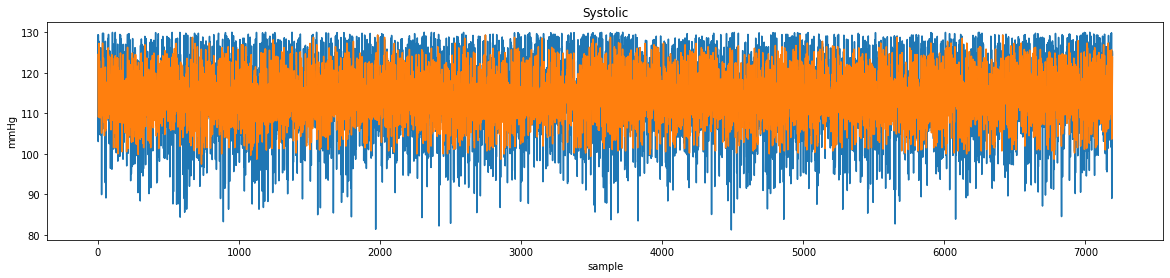

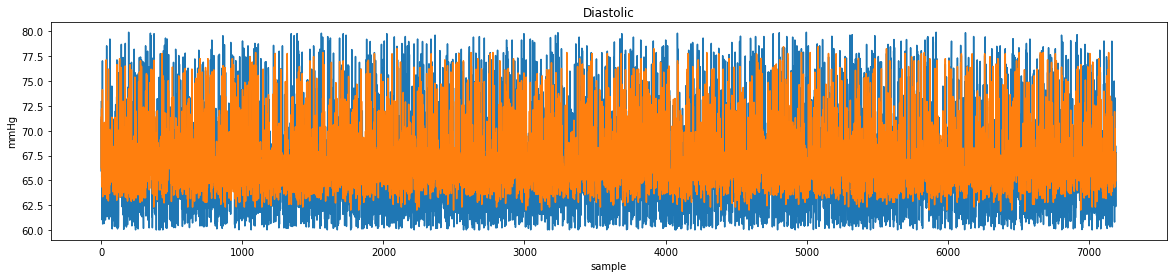

In [30]:
from sklearn.metrics import mean_absolute_error

error_sbp = P_SBP - O_SBP
error_dbp = P_DBP - O_DBP

mae_error_sbp = mean_absolute_error(P_SBP,O_SBP)
mae_error_dbp = mean_absolute_error(P_DBP,O_DBP)

error_sbp_std = np.std(abs(error_sbp)) 
error_dbp_std = np.std(abs(error_dbp)) 

print(f"MAE SBP: {mae_error_sbp} SD:{error_sbp_std} MAE DBP: {mae_error_dbp} SD:{error_dbp_std}")

plt.figure(1)
plt.figure(figsize=(20,4))
plt.title("Systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(O_SBP)
plt.plot(P_SBP)



plt.figure(2)
plt.figure(figsize=(20,4))
plt.title("Diastolic")
plt.xlabel("sample") 
plt.ylabel("mmHg")
plt.plot(O_DBP)
plt.plot(P_DBP)


In [31]:
# prediction = estimator.predict(x_test)

# error_sbp = prediction[:,0] - y_test["SBP"].values
# error_dbp = prediction[:,1] - y_test["DBP"].values

# mae_error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
# mae_error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

# error_sbp_std = np.std(abs(prediction[:,0] - y_test["SBP"].values))
# error_dbp_std = np.std(abs(prediction[:,1] - y_test["DBP"].values))

# print(f"MAE SBP: {mae_error_sbp} SD:{error_sbp_std} MAE DBP: {mae_error_dbp} SD:{error_dbp_std}")

# sbp = np.vstack(y_test["SBP"])
# dbp = np.vstack(y_test["DBP"])
# prd_sbp = np.vstack(prediction[:,0])
# prd_dbp = np.vstack(prediction[:,1])

# plt.figure(1)
# plt.title("SBP")
# plt.xlabel("sample") 
# plt.ylabel("mmHg") 
# plt.plot(sbp)
# plt.plot(prd_sbp)

# plt.figure(2)
# plt.title("DBP")
# plt.xlabel("sample") 
# plt.ylabel("mmHg") 
# plt.plot(dbp)
# plt.plot(prd_dbp)


# #np.savetxt('ANN_nor_24_9w_result.csv',np.column_stack((sbp,dbp,prd_sbp,prd_dbp,error_sbp,error_dbp)),delimiter=',')

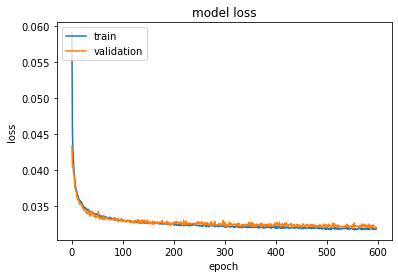

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
# 將模型儲存至 HDF5 檔案中
model.save('Remove_RF_LR_ANN_0309.h5')  # creates a HDF5 file 'my_model.h5'